We first create a REBOUND simulation, then we add two particles(Jupiter and Saturn) and integrate the system for 100 time units.

In [2]:
import rebound
sim = rebound.Simulation()

In [3]:
sim.add(hash="sun", m=1., x=0.002238658888973114, y=0.005712997542647009, z=-0.00013054408760144158, vx=-0.0003019172530227435, vy=0.0003204769648585501, vz=7.060746679333286e-06)
sim.add(hash="jupiter", m=0.0009547919152112404, x=-4.596576387734398, y=-2.903060527436125, z=0.11485275726871093, vx=0.22910198973165188, vy=-0.35005643910897744, vz=-0.003671111125676929)
sim.add(hash="saturn", m=0.0002858856727222417, x=-0.36854178651865627, y=-10.048571334269788, z=0.18938292051146408, vx=0.3062875233912964, vy=-0.012929578054438718, vz=-0.011965769853988187)

In [4]:
sim.integrate(100)

In [5]:
#  输出在100个时间单位的积分后三个粒子的位置参数
for i in range(0, sim.N):
    p = sim.particles[i]
    print(p.x, p.y, p.z)

-0.0055103360011024794 -0.00205996773130875 0.00015403869871585403
4.479074343055942 -2.229994580839996 -0.09091443786193867
-2.038069776919525 8.788608855341948 -0.07170817246044325


In [6]:
primary = sim.particles[0]

# 输出在100个时间单位的积分后两个粒子的半长轴、轨道偏心率以及真近点角参数
for i in range(1, sim.N):
    p = sim.particles[i]
    o = p.calculate_orbit(primary=primary)
    print(o.a, o.e, o.f)

5.20273927241573 0.04805908904852771 5.572204810439386
9.530112422685773 0.05411881384083361 0.1921286179939825


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-ta260xl5 because the default path (/home/fowdef/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


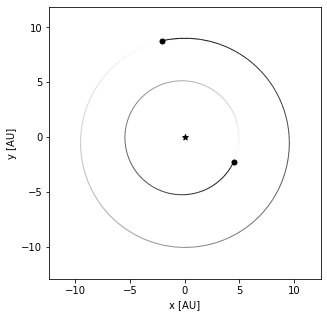

In [7]:
# 输出图像
%matplotlib inline
fig = rebound.OrbitPlot(sim, unitlabel="[AU]")